<a href="https://www.kaggle.com/code/vijays140291/shipmentprediction-model-comparison?scriptVersionId=122847855" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [51]:
#importing the library
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

# Prediction Whether the Shipped Product reached on time or not?

In [2]:
#loading the dataset
df=pd.read_csv('/kaggle/input/customer-analytics/Train.csv')
#loading the dataset
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


# Getting the Preliminary Information about the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


# Checking for Missing Values

In [5]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

* There is no missing values in the dataset

# Checking the Gender Classification

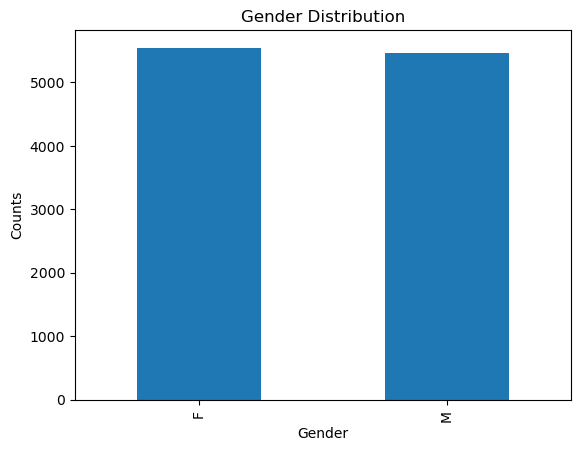

In [9]:
df['Gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.show()

# Customer Rating

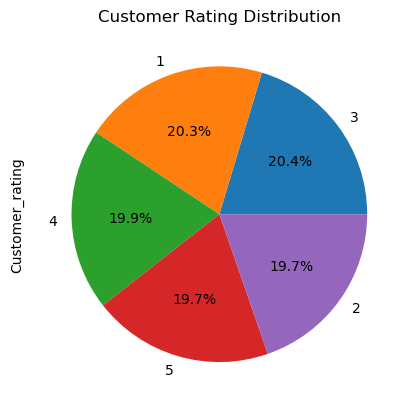

In [14]:
df['Customer_rating'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Customer Rating Distribution')
plt.show()


# Mode of Shipment

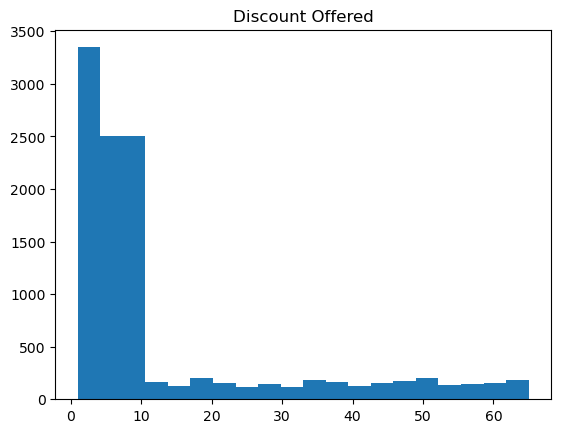

In [16]:
plt.hist(df['Discount_offered'],bins=20)
plt.title('Discount Offered')
plt.show()

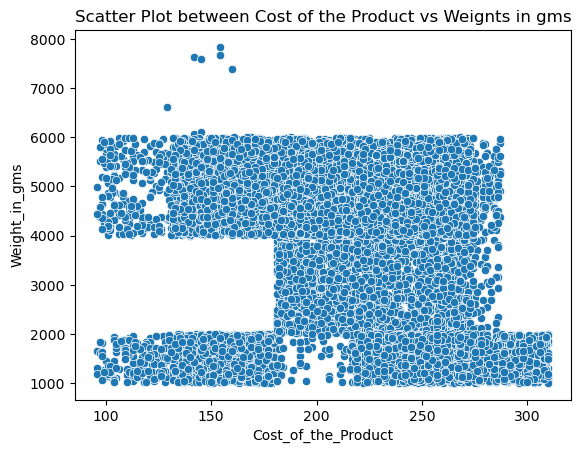

In [21]:
sns.scatterplot(x='Cost_of_the_Product',y='Weight_in_gms',data=df)
plt.title('Scatter Plot between Cost of the Product vs Weignts in gms')
plt.show()

# Preprocessing Function

In [29]:
def onehot_encode(df,columns):
    for column in columns:
        dummies=pd.get_dummies(df[column],prefix=column)
        df=pd.concat([df,dummies],axis=1)
        df=df.drop(column,axis=1)
    return df

In [41]:
def preprocess_inputs(df):
    df=df.copy()
    #droppin the id column as it is not providing any unique information 
    df=df.drop('ID',axis=1)
    df=onehot_encode(df,[column for column in df.select_dtypes('object')])
    
    y=df['Reached.on.Time_Y.N']
    x=df.drop('Reached.on.Time_Y.N',axis=1)
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)
    scaler=StandardScaler()
    scaler.fit(x_train)
    x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
    x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)
    
    return x_train,x_test,y_train,y_test

In [42]:
x_train,x_test,y_train,y_test=preprocess_inputs(df)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7699, 19)
(3300, 19)
(7699,)
(3300,)


# Training the Model

In [43]:

models={'Logistic Regression':LogisticRegression(),
'K-Nearest Classifier':KNeighborsClassifier(),
'Decision Tree Classifier':DecisionTreeClassifier(),
'Support Vector Classifier':SVC(),
'Support Vector Classifier(Linear)':LinearSVC(),
'Neural Network Classifier':MLPClassifier()}

In [46]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print(name)
    print(model.score(x_test,y_test))

Logistic Regression
0.6396969696969697
K-Nearest Classifier
0.6327272727272727
Decision Tree Classifier
0.6387878787878788
Support Vector Classifier
0.6536363636363637


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Support Vector Classifier(Linear)
0.6375757575757576
Neural Network Classifier
0.649090909090909


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


# Support Vector Classifier

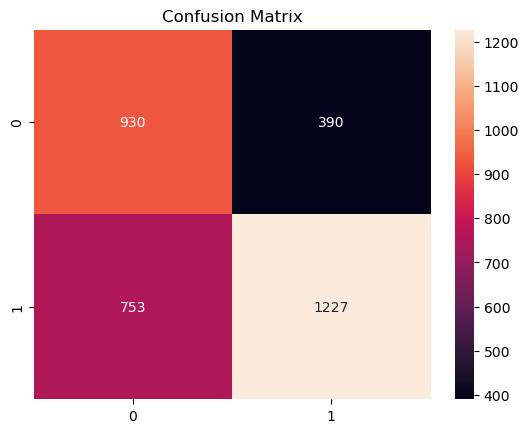

In [50]:
svc_model=SVC()
svc_model.fit(x_train,y_train)
y_pred=svc_model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.show()

# Classification Report

In [52]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.55      0.70      0.62      1320
           1       0.76      0.62      0.68      1980

    accuracy                           0.65      3300
   macro avg       0.66      0.66      0.65      3300
weighted avg       0.68      0.65      0.66      3300



cm=confusion_matrix(

In [35]:
[column for column in df.select_dtypes('object')]

['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

In [28]:
df['Mode_of_Shipment'].unique()

array(['Flight', 'Ship', 'Road'], dtype=object)